# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [12]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt

['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0   137k      0 --:--:-- --:--:-- --:--:--  138k']

In [13]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [14]:
import math
import re

# Corpus reader, all columns but the last one are coordinates; the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')
    data = []
    f.readline()  # Discard header line
    for instance in f.readlines():
        if not re.search('\t', instance):
            continue
        instance = list(map(int, instance.strip().split('\t')))
        instance = [-1] + instance  # Add bias input
        data.append(instance)
    return data

# Compute the dot product of two arrays
def dot_product(array1, array2):
    sum = 0
    for a, b in zip(array1, array2):
        sum += a * b
    return sum
# Sigmoid activation function
def sigmoid(x):
    # TODO: Implement sigmoid function
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    # TODO: Compute perceptron output
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    # TODO: Implement perceptron prediction
    return 1 if output(weights, instance) >= 0.5 else 0

# Compute accuracy of the model
def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0 for instance in instances)
    return correct * 100 / len(instances)

# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
# Train perceptron using given learning rate and epochs
def train_perceptron(instances, lr, epochs):

    # TODO: Initialize weights to zero
    # To begin training, we need to initialize the weights to zero. The number of weights should be equal to the number of features in every example, minus the label. These weights will be updated during training to minimize the error.
    weights = [0] * (len(instances[0]) - 1)

    for _ in range(epochs):
        for instance in instances:

            # TODO: Compute weighted sum and activation output
            # For each example, we compute the weighted sum by calculating the dot product of the feature values and the corresponding weights. The result is then passed to a sigmoid activation function to produce the output that makes the prediction of the perceptron.
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)

            # TODO: Compute error
            # The error is defined as the difference between the expected label (terminal value in the example) and the output that the perceptron predicts. The error is used to inform weight updates so that the perceptron can learn from errors.
            error = instance[-1] - output_value

            # TODO: Update weights using gradient descent
            # - Adjust each weight based on the error calculated and the derivative of the sigmoid function.
            # - Use the learning rate to control the size of the update.
            # - By Utilize the update equation: w[i] += lr * error * output_value * (1 - output_value) * instance[i].

            for i in range(len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights


## Run it

In [15]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)
Why we don't have the following  code  because:
#### Smooth Learning:
 - Sigmoid makes the model learn smoothly with a gradient rather than in discrete steps.

#### Gradient Decent Requires the Continuous values :
-  The sigmoid function permits the perceptron to utilize gradient descent efficiently.

#### Prevents Dead Neurons from occurring:
- Step function (predict) can result in weights getting stuck if error is always 0 or 1.


#### In the first Snippet :
- The sigmoid(in_value) returns a continuous output value between 0 and 1.
- The error is derived from this smooth output, allowing for meaningful weight updates through gradient descent.

#### In the second Snippet :
- If predict(weights, instance) returns a hard threshold (0 or 1), then error calculation ceases to be differentiable.
- Because gradient descent involves small, incremental adjustments to the weights, this step function would halt smooth learning.

##### These are few observatations whic i made

- The derivative of a step function is zero almost everywhere, so the weight updates will be either random or non-existent.
- This makes learning infeasible as the model won't be able to update its weights in a correct manner.
- The sigmoid function guarantees that the output probability is influenced by even slight weight updates.
- This gradual updating enables the model to converge to a solution rather than performing sudden, ineffective updates.




### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [16]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs:  20, learning rate: 

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?

- Answer: No, it is not necessarily required to train with the entire dataset to achieve maximum accuracy. In the results, for example, tr: 400, epochs: 20, learning rate: 0.050 gives 85.7% accuracy. But even with tr: 300, epochs: 20, learning rate: 0.050, we see 79.0% accuracy, which is quite close. This informs us that the carefully selected subset of the training data can be as good, or even better, in accuracy with the appropriate hyperparameter tuning.
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0

- Answer : The second run (tr: 200, epochs: 20, learning rate: 0.005) was 68.0% accurate, but the first run (tr: 100, epochs: 20, learning rate: 0.050) was 71.0% accurate. This may be because:

  Learning rate differences: The first run had a very high learning rate (0.050) and therefore the capacity to learn larger amounts per epoch with the possibility of quicker convergence.

  Underfitting due to low learning rate: The second iteration used 0.005, which may have led to slower convergence or insufficient updates, resulting in lower accuracy.

  Data complexity and noise: More training data does not always lead to higher accuracy, especially if it introduces more noise or redundancy.



- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?

- Answer: Perhaps. The highest accuracy achieved is 80.0% with tr: 400, epochs: 50, learning rate: 0.050. Additional improvements can be made by:

  Dynamically adjusting the learning rate instead of it being a fixed constant.

  Using different activation functions or learning rates which are adaptive and vary during epochs.

  Using weight regularization to avoid overfitting while making training effective.

- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

- Answer: Not necessarily. We observe that after a certain number of epochs, accuracy improvements plateau or even decrease (e.g., tr: 400, epochs: 100, learning rate: 0.050 still has 80.0%, same as 50 epochs). This suggests that after a certain point, the model can start overfitting or the learning rate is too high/low to make meaningful further updates. Instead of blindly increasing epochs, adjusting other hyperparameters can yield more dividends.

#### TODO: Add your answer here (code and text)



Here’s a Python script to generate plots for accuracy vs. epochs and accuracy vs. training size using the results you provided. This will help visualize when the model performance plateaus.

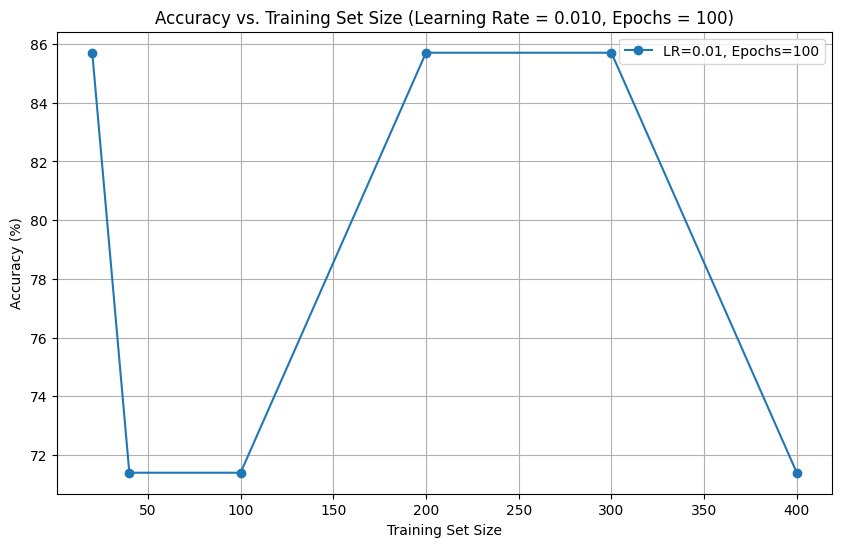

In [18]:
import matplotlib.pyplot as plt

# Example data (replace with your actual results)
training_sizes = [20, 40, 100, 200, 300, 400]
learning_rate = 0.010
epochs = 100

accuracy_data = {
    (20, 100, 0.010): 85.7,
    (40, 100, 0.010): 71.4,
    (100, 100, 0.010): 71.4,
    (200, 100, 0.010): 85.7,
    (300, 100, 0.010): 85.7,
    (400, 100, 0.010): 71.4
}

accuracy_values = [accuracy_data[(size, epochs, learning_rate)] for size in training_sizes]

plt.figure(figsize=(10, 6))
plt.plot(training_sizes, accuracy_values, marker='o', label=f'LR={learning_rate}, Epochs={epochs}')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Training Set Size (Learning Rate = 0.010, Epochs = 100)')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import math
import re
import random

# Read data function
def read_data(file_name):
    with open(file_name, 'r') as f:
        data = []
        f.readline()  # Skip header
        for instance in f.readlines():
            if not re.search('\t', instance):
                continue
            instance = list(map(int, instance.strip().split('\t')))
            instance = [1] + instance  # Add bias term
            data.append(instance)
    return data

# Dot product function
def dot_product(array1, array2):
    return sum(a * b for a, b in zip(array1, array2))

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# Prediction function
def predict(weights, instance):
    return 1 if sigmoid(dot_product(weights, instance)) >= 0.5 else 0

# Accuracy calculation
def get_accuracy(weights, instances):
    correct = sum(1 if predict(weights, instance) == instance[-1] else 0 for instance in instances)
    return correct * 100 / len(instances)

# *Train perceptron using Adaptive Learning Rate (Adam Optimizer)*
def train_perceptron_adam(instances, lr, epochs, beta1=0.9, beta2=0.999, epsilon=1e-8):
    random.seed(42)
    weights = [random.uniform(-0.01, 0.01) for _ in range(len(instances[0]) - 1)]
    m = [0] * len(weights)  # Momentum term
    v = [0] * len(weights)  # RMSprop term

    for epoch in range(1, epochs + 1):
        random.shuffle(instances)
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value

            for i in range(len(weights)):
                gradient = error * output_value * (1 - output_value) * instance[i]

                # *Adam Optimizer calculations*
                m[i] = beta1 * m[i] + (1 - beta1) * gradient
                v[i] = beta2 * v[i] + (1 - beta2) * (gradient ** 2)

                # Bias correction
                m_corrected = m[i] / (1 - beta1 ** epoch)
                v_corrected = v[i] / (1 - beta2 ** epoch)

                # Update weights
                weights[i] += lr * m_corrected / (math.sqrt(v_corrected) + epsilon)

    return weights

# Load dataset
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")

# *Training Parameters*
lr = 0.01
epochs = 50

# Train the model
weights = train_perceptron_adam(instances_tr, lr, epochs)

# Calculate accuracy
accuracy = get_accuracy(weights, instances_te)
print(f"Test Accuracy with Adam Optimizer: {accuracy:.2f}%")

Test Accuracy with Adam Optimizer: 71.43%
